In [48]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cosine
from gensim.models import Word2Vec
from itertools import combinations
from tqdm import tqdm_notebook

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [3]:
pd.options.display.max_rows = 1000

In [4]:
m1 = Word2Vec.load('../data/northeast.bin')

In [5]:
m2 = Word2Vec.load('../data/south.bin')

In [6]:
m1_vocab = set(m1.wv.vocab.keys())

In [7]:
m2_vocab = set(m2.wv.vocab.keys())

In [8]:
vocab = set.intersection(m1_vocab, m2_vocab)

In [44]:
m1.most_similar('future', topn=30)

[('#future', 0.4707292914390564),
 ('environment', 0.4664434790611267),
 ('vision', 0.4526408910751343),
 ('disruption', 0.4488123059272766),
 ('workforce', 0.4360583424568176),
 ('evolution', 0.42711004614830017),
 ('demise', 0.42570436000823975),
 ('importance', 0.4196147322654724),
 ('current', 0.41241762042045593),
 ('#ai', 0.4077520966529846),
 ('ecosystem', 0.4015895128250122),
 ('world', 0.3986409604549408),
 ('innovation', 0.3985614776611328),
 ('industry', 0.397148072719574),
 ('workplace', 0.3926817774772644),
 ('growth', 0.3883310854434967),
 ('downfall', 0.3877112865447998),
 ('success', 0.3876093029975891),
 ('apocalypse', 0.38388705253601074),
 ('retirement', 0.38374513387680054),
 ('economy', 0.38292959332466125),
 ('classroom', 0.38266217708587646),
 ('futures', 0.38233011960983276),
 ('uncertainty', 0.38059288263320923),
 ('outcomes', 0.38049864768981934),
 ('generation', 0.3804638385772705),
 ('capabilities', 0.37959936261177063),
 ('expertise', 0.37851113080978394),


In [45]:
m2.most_similar('future', topn=30)

[('#future', 0.5354784727096558),
 ('environment', 0.4608862102031708),
 ('futures', 0.4495675563812256),
 ('workforce', 0.4236217439174652),
 ('importance', 0.4124824106693268),
 ('demise', 0.4087694585323334),
 ('vision', 0.4072023034095764),
 ('world', 0.40298983454704285),
 ('retirement', 0.39981478452682495),
 ('evolution', 0.39876511693000793),
 ('classroom', 0.38804003596305847),
 ('life', 0.38655632734298706),
 ('roadmap', 0.38359570503234863),
 ('disruption', 0.3824882507324219),
 ('finances', 0.38226318359375),
 ('greatness', 0.38131940364837646),
 ('profession', 0.38119643926620483),
 ('outcome', 0.3795522451400757),
 ('workplace', 0.37652039527893066),
 ('current', 0.3761433959007263),
 ('universe', 0.373193621635437),
 ('growth', 0.37295275926589966),
 ('success', 0.37078121304512024),
 ('role', 0.36806827783584595),
 ('afterlife', 0.36779117584228516),
 ('#infrastructure', 0.3662795126438141),
 ('economy', 0.36561623215675354),
 ('blockchain', 0.3650515675544739),
 ('#ai'

In [22]:
def neighbors_similarity(m1, m2, token, topn=20):
    
    m1n = [t for t, _ in m1.most_similar(token, topn=topn)]
    m2n = [t for t, _ in m2.most_similar(token, topn=topn)]
    
    sim = 0
    for t1, t2 in [(t1, t2) for t1 in m1n for t2 in m2n]:
        if t1 in m1 and t2 in m1:
            sim += m1.similarity(t1, t2)
            
    return sim

In [47]:
%time neighbors_similarity(m1, m2, 'universe')

CPU times: user 17.9 ms, sys: 1.38 ms, total: 19.2 ms
Wall time: 10.2 ms


119.76173110848821

In [84]:
data = []
for v in tqdm_notebook(vocab):
        count = m1.wv.vocab[v].count + m2.wv.vocab[v].count
        score = neighbors_similarity(m1, m2, v)
        data.append((v, count, score))

HBox(children=(IntProgress(value=0, max=22318), HTML(value='')))

In [85]:
df = pd.DataFrame(data, columns=('word', 'count', 'score'))

In [86]:
len(df)

22318

In [91]:
df[df['count'] > 1e5].sort_values('score', ascending=True).head(100)

,word,count,score
22135,ma,266797,-8.569516
13150,#listenlive,281483,8.775800
13184,rt,1243817,11.718835
17542,unknown,249996,18.058784
3017,unkn,109925,22.155887
11326,#hiring,961144,26.575404
11315,austin,128336,27.305741
12967,automatically,710859,32.383027
13351,gt,5947379,32.855070
18830,#mplusrewards,112845,33.684681


In [88]:
def compare(token):
    for t, _ in m1.most_similar(token, topn=20):
        print(t)
    print('\n')
    for t, _ in m2.most_similar(token, topn=20):
        print(t)

In [99]:
compare('bank')

banks
banking
savings
bankers
debit
deposit
corporate
pension
mall
union
pnc
capital
pharmaceutical
atm
account
walgreens
loan
merchant
postal
investments


banks
banking
securities
debit
savings
jpmorgan
treasury
deposits
bankers
corp
amex
payable
coinbase
account
brokerage
lender
@paypal
deposit
union
mastercard


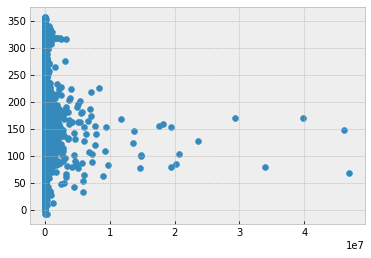

In [90]:
plt.scatter(df['count'], df['score'])